# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [2]:
#your code here

wnba = pd.read_csv('/Users/celinaagostinho/Desktop/M2-mini-project2/data/wnba_clean.csv')

**Use describe() to take an initial look at the data.**

In [3]:
#your code here

wnba.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,27.112676,24.429577,500.105634,74.401408,168.704225,43.102817,14.830986,43.697183,24.978169,39.535211,49.422535,75.828873,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,3.667180,7.075477,289.373393,55.980754,117.165809,9.855199,17.372829,46.155302,18.459075,36.743053,44.244697,18.536151,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,24.000000,22.000000,242.250000,27.000000,69.000000,37.125000,0.000000,3.000000,0.000000,13.000000,17.250000,71.575000,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.500000,506.000000,69.000000,152.500000,42.050000,10.500000,32.000000,30.550000,29.000000,35.500000,80.000000,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,752.500000,105.000000,244.750000,48.625000,22.000000,65.500000,36.175000,53.250000,66.500000,85.925000,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,225.000000,100.000000,168.000000,186.000000,100.000000,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [4]:
# game-related stats have a wide range of values
# extremes in the weight and age columns
# check which are the players with a very high (or low) age/weight

# let's check low weight range (bottom 10%)
# get everything between minimum value and value at 10%

wnba_low_weight = wnba[(wnba['Weight'] >= wnba['Weight'].min()) & (wnba['Weight'] <= wnba['Weight'].quantile(q=0.1))]
wnba_low_weight

# these don't seem to be errors in the data - height and BMI is consistent with weight

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
22,Briann January,IND,G,173,65,21.718066,US,"November 1, 1987",29,Arizona State,9,25,657,81,205,39.5,18,57,31.6,58,71,81.7,12,25,37,98,23,4,53,238,0,0
38,Courtney Williams,CON,G,173,62,20.715694,US,"November 5, 1994",22,South Florida,1,29,755,168,338,49.7,8,30,26.7,31,36,86.1,38,84,122,60,15,6,39,375,1,0
42,Danielle Robinson,PHO,G,175,57,18.612245,US,"October 5, 1989",27,Oklahoma,7,28,680,79,178,44.4,0,5,0.0,51,61,83.6,13,73,86,106,33,4,58,209,0,0
51,Erica Wheeler,IND,G,170,65,22.491349,US,"February 5, 1991",26,Rutgers,3,30,767,130,321,40.5,42,129,32.6,34,40,85.0,11,57,68,117,38,1,68,336,0,0
59,Ivory Latta,WAS,G,168,63,22.321429,US,"September 25, 1984",32,North Carolina,12,29,499,79,218,36.2,40,114,35.1,47,55,85.5,7,20,27,49,12,1,22,245,0,0
62,Jazmon Gwathmey,IND,G,188,65,18.390675,PR,"January 24, 1993",24,James Madison,2,24,371,50,140,35.7,12,49,24.5,30,39,76.9,15,34,49,17,13,19,32,142,0,0
82,Kristi Toliver,WAS,G,170,59,20.415225,US,"January 27, 1987",30,Maryland,9,29,845,119,284,41.9,67,194,34.5,44,49,89.8,9,50,59,91,20,8,48,349,0,0
85,Layshia Clarendon,ATL,G,175,64,20.897959,US,"February 5, 1991",26,UC Berkeley,5,30,900,124,320,38.8,8,53,15.1,73,81,90.1,27,88,115,206,29,1,82,329,3,0


In [5]:
# let's check high weight range (top 10%)
# get everything between value at 90% and maximum value

wnba_high_weight = wnba[(wnba['Weight'] >= wnba['Weight'].quantile(q=0.9)) & (wnba['Weight'] <= wnba['Weight'].max())]
wnba_high_weight

# not errors: again, height and BMI information seem to be consistent with weight

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
12,Amanda Zahui B.,NY,C,196,113,29.414827,SE,"August 9, 1993",24,Minnesota,3,25,133,20,53,37.7,2,8,25.0,9,12,75.0,5,18,23,7,4,5,12,51,0,0
17,Bashaara Graves,CHI,F,188,91,25.746944,US,"March 17, 1994",23,Tennessee,1,5,59,8,14,57.1,0,0,0.0,3,4,75.0,4,13,17,3,0,1,3,19,0,0
18,Breanna Lewis,DAL,C,196,93,24.208663,US,"June 22, 1994",23,Kansas State,R,12,50,2,12,16.7,0,0,0.0,3,4,75.0,2,7,9,2,0,0,7,7,0,0
23,Brionna Jones,CON,F,191,104,28.507990,US,"December 18, 1995",21,Maryland,R,19,112,14,26,53.8,0,0,0.0,16,19,84.2,11,14,25,2,7,1,7,44,0,0
25,Brittney Griner,PHO,C,206,93,21.915355,US,"October 18, 1990",26,Baylor,5,22,682,167,293,57.0,0,0,0.0,127,154,82.5,43,129,172,39,13,54,52,461,6,0
31,Carolyn Swords,SEA,C,198,95,24.232221,US,"July 19, 1989",28,Boston College,6,26,218,19,39,48.7,0,0,0.0,16,20,80.0,10,29,39,9,5,4,22,54,0,0
36,Courtney Paris,DAL,C,193,113,30.336385,US,"September 21, 1987",29,Oklahoma,7,16,217,32,57,56.1,0,0,0.0,6,12,50.0,28,34,62,5,6,8,18,70,0,0
41,Danielle Adams,CON,F/C,185,108,31.555880,US,"February 19, 1989",28,Texas A&M,5,18,81,16,43,37.2,12,30,40.0,5,5,100.0,6,4,10,4,4,4,7,49,0,0
53,Erlana Larkins,IND,F,185,93,27.173119,US,"February 4, 1986",31,North Carolina,9,20,386,36,92,39.1,9,35,25.7,21,24,87.5,9,26,35,24,11,8,13,102,0,0
64,Jennifer Hamson,IND,C,201,95,23.514269,US,"January 23, 1992",25,Brigham Young,1,10,50,2,12,16.7,0,3,0.0,8,10,80.0,5,6,11,6,2,2,3,12,0,0


In [6]:
# let's check low age range (bottom 10%)
# get everything between minimum value and value at 10%

wnba_younger = wnba[(wnba['Age'] >= wnba['Age'].min()) & (wnba['Age'] <= wnba['Age'].quantile(q=0.1))]
wnba_younger

# value for age consistent with birthdate

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0
15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
17,Bashaara Graves,CHI,F,188,91,25.746944,US,"March 17, 1994",23,Tennessee,1,5,59,8,14,57.1,0,0,0.0,3,4,75.0,4,13,17,3,0,1,3,19,0,0
18,Breanna Lewis,DAL,C,196,93,24.208663,US,"June 22, 1994",23,Kansas State,R,12,50,2,12,16.7,0,0,0.0,3,4,75.0,2,7,9,2,0,0,7,7,0,0
19,Breanna Stewart,SEA,F/C,193,77,20.671696,US,"August 27, 1994",22,Connecticut,2,29,952,201,417,48.2,46,123,37.4,136,171,79.5,43,206,249,78,29,47,68,584,8,0
21,Bria Holmes,ATL,G,185,77,22.498174,US,"April 19, 1994",23,West Virginia,R,28,655,85,231,36.8,9,50,18.0,56,84,66.7,29,56,85,52,23,7,31,235,0,0
23,Brionna Jones,CON,F,191,104,28.507990,US,"December 18, 1995",21,Maryland,R,19,112,14,26,53.8,0,0,0.0,16,19,84.2,11,14,25,2,7,1,7,44,0,0


In [7]:
# let's check high age range (top 10%)
# get everything between value at 90% and maximum value

wnba_older = wnba[(wnba['Age'] >= wnba['Age'].quantile(q=0.9)) & (wnba['Age'] <= wnba['Age'].max())]
wnba_older

# again, value for age consistent with birthdate

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
27,Camille Little,PHO,F,188,82,23.200543,US,"January 18, 1985",32,North Carolina,11,30,759,93,219,42.5,9,52,17.3,33,52,63.5,42,71,113,42,28,13,50,228,0,0
29,Candice Dupree,IND,F,188,81,22.917610,US,"February 25, 1984",33,Temple,12,29,911,189,370,51.1,0,2,0.0,57,65,87.7,31,124,155,47,28,12,42,435,2,0
30,Cappie Pondexter,CHI,G,175,73,23.836735,US,"July 1, 1983",34,Rutgers,11,24,676,94,258,36.4,8,32,25.0,54,67,80.6,10,59,69,104,17,5,56,250,2,0
45,Diana Taurasi,PHO,G,183,74,22.096808,US,"November 6, 1982",34,Connecticut,13,20,591,121,255,47.5,22,66,33.3,112,118,94.9,31,98,129,32,20,31,28,376,3,0
52,Érika de Souza,SAN,C,196,86,22.386506,BR,"September 3, 1982",34,Brazil,13,30,579,65,112,58.0,0,0,0.0,29,32,90.6,58,74,132,35,18,7,37,159,0,0
59,Ivory Latta,WAS,G,168,63,22.321429,US,"September 25, 1984",32,North Carolina,12,29,499,79,218,36.2,40,114,35.1,47,55,85.5,7,20,27,49,12,1,22,245,0,0
67,Jia Perkins,MIN,G,173,75,25.059307,US,"February 23, 1982",35,Texas Tech,14,30,932,178,420,42.4,47,123,38.2,114,134,85.1,24,72,96,103,41,11,83,517,0,0
86,Leilani Mitchell,PHO,G,165,58,21.303949,US,"June 15, 1985",32,Utah,9,30,623,70,182,38.5,31,92,33.7,62,75,82.7,12,57,69,108,26,9,50,233,0,0
88,Lindsay Whalen,MIN,G,175,78,25.469388,US,"September 5, 1982",34,Minnesota,14,22,520,69,153,45.1,12,34,35.3,27,36,75.0,8,46,54,90,11,2,44,177,0,0


In [8]:
# there's also the between method (for data series)
# Option inclusive=True is used by default in between method
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.between.html

wnba_age_older = wnba[wnba['Age'].between(wnba['Age'].quantile(q=0.9), wnba['Age'].max())]
wnba_age_older

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
27,Camille Little,PHO,F,188,82,23.200543,US,"January 18, 1985",32,North Carolina,11,30,759,93,219,42.5,9,52,17.3,33,52,63.5,42,71,113,42,28,13,50,228,0,0
29,Candice Dupree,IND,F,188,81,22.917610,US,"February 25, 1984",33,Temple,12,29,911,189,370,51.1,0,2,0.0,57,65,87.7,31,124,155,47,28,12,42,435,2,0
30,Cappie Pondexter,CHI,G,175,73,23.836735,US,"July 1, 1983",34,Rutgers,11,24,676,94,258,36.4,8,32,25.0,54,67,80.6,10,59,69,104,17,5,56,250,2,0
45,Diana Taurasi,PHO,G,183,74,22.096808,US,"November 6, 1982",34,Connecticut,13,20,591,121,255,47.5,22,66,33.3,112,118,94.9,31,98,129,32,20,31,28,376,3,0
52,Érika de Souza,SAN,C,196,86,22.386506,BR,"September 3, 1982",34,Brazil,13,30,579,65,112,58.0,0,0,0.0,29,32,90.6,58,74,132,35,18,7,37,159,0,0
59,Ivory Latta,WAS,G,168,63,22.321429,US,"September 25, 1984",32,North Carolina,12,29,499,79,218,36.2,40,114,35.1,47,55,85.5,7,20,27,49,12,1,22,245,0,0
67,Jia Perkins,MIN,G,173,75,25.059307,US,"February 23, 1982",35,Texas Tech,14,30,932,178,420,42.4,47,123,38.2,114,134,85.1,24,72,96,103,41,11,83,517,0,0
86,Leilani Mitchell,PHO,G,165,58,21.303949,US,"June 15, 1985",32,Utah,9,30,623,70,182,38.5,31,92,33.7,62,75,82.7,12,57,69,108,26,9,50,233,0,0
88,Lindsay Whalen,MIN,G,175,78,25.469388,US,"September 5, 1982",34,Minnesota,14,22,520,69,153,45.1,12,34,35.3,27,36,75.0,8,46,54,90,11,2,44,177,0,0


### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

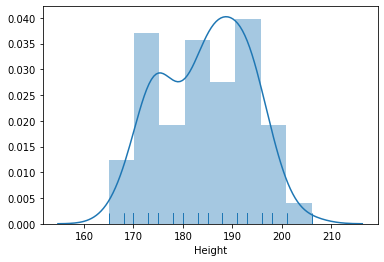

In [9]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html

# height

sns.distplot(wnba['Height'], rug=True)
plt.show()

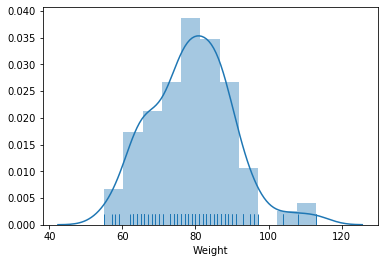

In [10]:
# weight

sns.distplot(wnba['Weight'], rug=True)
plt.show()

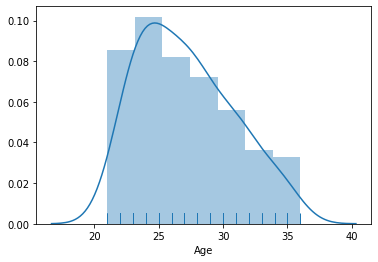

In [11]:
# age

sns.distplot(wnba['Age'], rug=True)
plt.show()

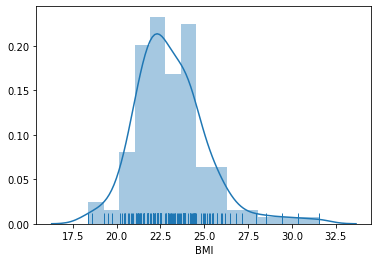

In [12]:
# https://pythonbasics.org/seaborn-distplot/
# BMI

#plt.grid(True)
sns.distplot(wnba['BMI'], rug=True)
plt.show()

**What conclusions do you think we can take from this plots?**

In [13]:
#your conclusions here

'''
Height has a bimodal distribution, but with a higher peak in the upper range of heights.
Weight has a more or less normal distribution, with more values in the mid-lower range and some outliers in the upper range.
Age is skewed to the left, which is expected in professional sports.
BMI has a normal distribution.
'''

'\nHeight has a bimodal distribution, but with a higher peak in the upper range of heights.\nWeight has a more or less normal distribution, with more values in the mid-lower range and some outliers in the upper range.\nAge is skewed to the left, which is expected in professional sports.\nBMI has a normal distribution.\n'

In addition to what the describe() method already told us, we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

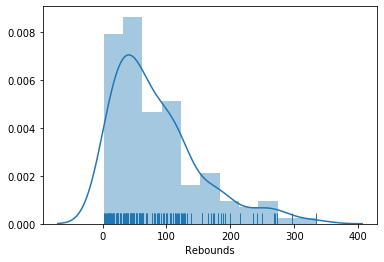

In [14]:
# REB - rebounds

sns.distplot(wnba['REB'], rug=True)
plt.xlabel('Rebounds')
plt.show()

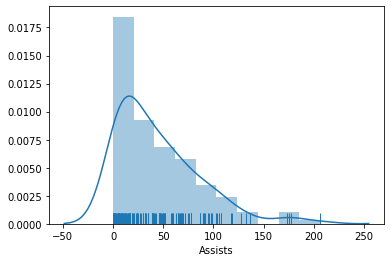

In [15]:
# AST - Assists

sns.distplot(wnba['AST'], rug=True)
plt.xlabel('Assists')
plt.show()

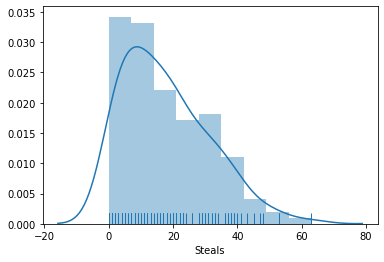

In [16]:
# STL - steals

sns.distplot(wnba['STL'], rug=True)
plt.xlabel('Steals')
plt.show()

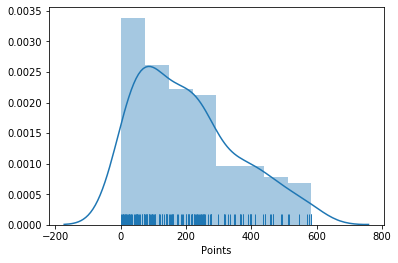

In [17]:
# PTS - points

sns.distplot(wnba['PTS'], rug=True)
plt.xlabel('Points')
plt.show()

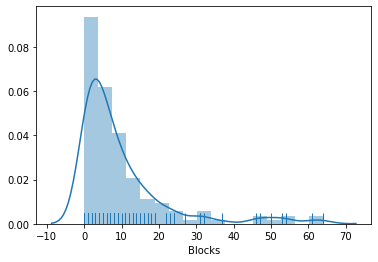

In [18]:
# BLK - blocks

sns.distplot(wnba['BLK'], rug=True)
plt.xlabel('Blocks')
plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here


'''
REB - rebounds has a normal distribution, positively skewed and with some outliers.

AST - Assists has a normal distribution, positively skewed and with some outliers.

STL - steals has a normal distribution, positively skewed.

PTS - points has a normal distribution, positively skewed.

BLK - blocks has a normal distribution, positively skewed and with some outliers.

'''


As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

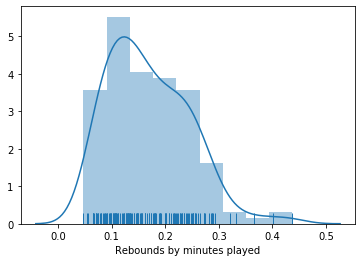

In [19]:
# REB - rebounds by minutes played

sns.distplot(wnba['REB']/wnba['MIN'], rug=True)
plt.xlabel('Rebounds by minutes played')
plt.show()


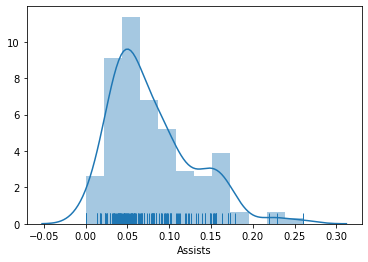

In [20]:
# AST - Assists by minutes played

sns.distplot(wnba['AST']/wnba['MIN'], rug=True)
plt.xlabel('Assists')
plt.show()

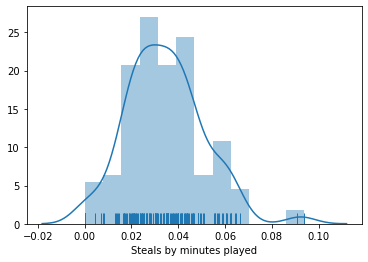

In [21]:
# STL - steals by minutes played

sns.distplot(wnba['STL']/wnba['MIN'], rug=True)
plt.xlabel('Steals by minutes played')
plt.show()

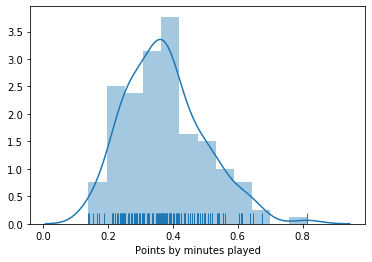

In [22]:
# PTS - points by minutes played

sns.distplot(wnba['PTS']/wnba['MIN'], rug=True)
plt.xlabel('Points by minutes played')
plt.show()

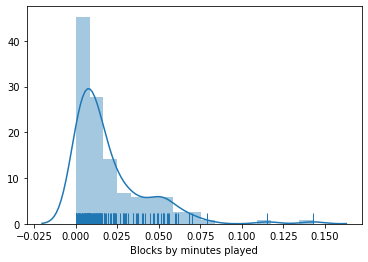

In [23]:
# BLK - blocks by minutes played

sns.distplot(wnba['BLK']/wnba['MIN'], rug=True)
plt.xlabel('Blocks by minutes played')
plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here


'''
REB by minutes played - rebounds has a normal distribution, positively skewed, 'fatter' than the one without minutes
played.

AST by minutes played - Assists has a normal distribution, positively skewed but less so than the distribution 
without minutes played, with some outliers.

STL by minutes played - steals has a normal distribution, not skewed, with some outliers.

PTS by minutes played - points has a normal distribution, less positively skewed than the one without minutes played.

BLK by minutes played - blocks has a normal distribution, positively skewed and with some outliers (just like the 
distribution without minutes played).

'''

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [ ]:
#your comments here

'''
We do not have the necassary data to asnwer these questions. We'd also need data on the sister's physical make-up, 
free throws by female professional players and NBA players.

'''